<a href="https://colab.research.google.com/github/thdnjs0730/2024_Deep/blob/main/%EC%88%98_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EC%86%8C%ED%94%84%ED%8A%B8%EC%9B%A8%EC%96%B4%ED%95%99%EA%B3%BC_20231596_%EC%B5%9C%EC%86%8C%EC%9B%90_5%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C(K_means%2C_PCA_%ED%99%9C%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means: 비지도 학습 - 클러스터링 - 차원 축소 (PCA)
**K-means**는 비지도 학습의 대표적인 클러스터링 알고리즘

---

## 📌 K-means 클러스터링의 주요 개념

1. **비지도 학습**:
   - **K-means**는 정답(레이블)이 없는 데이터에서 패턴을 찾는 **비지도 학습** 방식의 알고리즘
   - 데이터를 미리 정의된 K개의 그룹으로 나누며, 각 그룹은 데이터 간의 **유사도**를 기준으로 형성

2. **거리 기반 군집화**:
   - 데이터 간의 유사도를 **거리**로 측정
   - **클러스터 중심(centroid)**이란 각 클러스터 내 데이터들의 평균 좌표를 의미하며, K-means는 각 데이터를 가장 가까운 클러스터 중심에 배정

---

## 🔍 데이터 간 유사도(거리) 측정 방법

여러 가지 거리 측정 방법이 사용

1. **유클리드 거리 (Euclidean Distance)**:
   - 가장 많이 사용되는 거리 측정 방법
   - **두 점 사이의 직선 거리**를 계산
   
2. **맨해튼 거리 (Manhattan Distance)**:
   - 두 점 사이의 **축을 따라 이동하는 거리**를 측정
   
3. **민코프스키 거리 (Minkowski Distance)**:
   - **유클리드 거리**와 **맨해튼 거리**를 포함한 **일반화된 거리 측정** 방법
   - 파라미터 \( p \)에 따라 거리 계산 방식이 달라짐
   
4. **코사인 유사도 (Cosine Similarity)**:
   - 두 벡터 사이의 **각도**를 기준으로 유사도를 측정
   - **유사도**를 측정하는 방식이므로 **1에 가까울수록** 유사

---

## 🔑 K-means의 과정

1. **K개의 클러스터 중심을 임의로 설정**.
2. 각 데이터를 가장 가까운 클러스터 중심에 배정
3. 클러스터 내 데이터들의 평균 좌표를 계산하여 **새로운 클러스터 중심**을 설정
4. 중심이 더 이상 이동하지 않을 때까지 반복
5. 최종 클러스터가 형성되면 완료

---

## 🔍 K-means의 장단점

### 장점:
- **단순하고 빠름**: 계산이 상대적으로 간단하고, 대규모 데이터셋에도 적용할 수 있음
- **확장성**: 대규모 데이터에 대해 쉽게 확장 가능

### 단점:
- **K값을 미리 정해야 함**: 클러스터 개수를 사용자가 미리 지정해야 함
- **비선형 데이터에 취약**: 구형 클러스터만 처리할 수 있으며, 복잡한 모양의 클러스터에는 한계가 있음
- **이상치(outliers)에 민감**: 이상치가 클러스터 형성에 큰 영향을 미침

---

## 📊 K-means와 다른 군집 분석 비교

| 알고리즘 | 군집 기준 | 이상치 처리 | 클러스터 형태 | 연산량 |
|----------|------------|--------------|---------------|---------|
| **K-means** | 거리 | 약함 | 구형 | 낮음 |
| **DBSCAN** | 밀도 | 강함 | 복잡한 형태 (오목/볼록) 처리 가능 | 높음 |
| **계층적 군집 분석** | 거리 또는 밀도 | 보통 | 다양한 형태 가능 | 중간 |

---

**K-means**는 데이터가 **구형 클러스터**를 형성하는 경우 적합하며, **대규모 데이터**에서도 빠르게 작동 <br>
다만, **이상치 처리**나 **비선형 데이터**에는 다른 알고리즘이 더 적합


In [ ]:
#library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn import svm, datasets # SVM과 샘플 데이터셋을 위한 라이브러리
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # SVM 모델
from sklearn.preprocessing import StandardScaler # 데이터 스케일링
from sklearn.cluster import KMeans

### sales data.csv
#### 1) Channel: 고객 채널(호텔/레스토랑), 또는 소매 채널(명목형 데이터): 1,2,
#### 2) Region : 고객 지역(명목형 데이터): 1,2,3,
#### 3) Fresh  : 신선한 제품에 대한 연간 지출(연속형 데이터)
#### 4) Milk   : 유제품에 대한 연간 지출(연속형 데이터)
#### 5) Grecery: 식료품에 대한 연간 지출(연속형 데이터)
#### 6) Frozen : 냉동 제품에 대한 연간 지출(연속형 데이터)
#### 7) Detergents_Paper : 세제 및 종이 제품에대한 연간 지출(연속형 데이터)
#### 8) Delicassen : 조제 식품에 대한 연간 지출(연속형 데이터)

In [ ]:
# 데이터 불러오기
from google.colab import files # 파일 업로드
file_uploaded = files.upload() # 사용자가 업로드한 파일 불러오기
data = pd.read_csv('sales data.csv')
data.head()

Saving sales data.csv to sales data.csv


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
# 연속형과 명목형 데이터로 분류
# 머신러닝 모델에 사용하기 위해 범주형 데이터를 수치형 데이터로 변환하는 전처리 과정
# 원-핫 인코딩(One-hot Encoding)을 통해 범주형 데이터를 0, 1로 변환
categorical_features = ['Channel', 'Region'] # 범주형
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'] # 수치형

# Channel과 Region(범주형)에 대해 원-핫 잇코딩 수행
for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True) # 원본 데이터 삭제
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,False,True,False,False,True
1,7057,9810,9568,1762,3293,1776,False,True,False,False,True
2,6353,8808,7684,2405,3516,7844,False,True,False,False,True
3,13265,1196,4221,6404,507,1788,True,False,False,False,True
4,22615,5410,7198,3915,1777,5185,False,True,False,False,True


In [ ]:
# 연속형 데이터의 전처리 (스케일링: StandardScaler)
scaler = StandardScaler()
scaler.fit(data)  # 스케일링에 필요한 정보 학습
data_transformed = scaler.transform(data)  # 스케일링 수행

# 스케일링 완료한 데이터를 df로 다시 변환
data_transformed = pd.DataFrame(data_transformed, columns=data.columns)
data_transformed.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,-1.448652,1.448652,-0.460566,-0.345822,0.626422
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,-1.448652,1.448652,-0.460566,-0.345822,0.626422
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,-1.448652,1.448652,-0.460566,-0.345822,0.626422
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,0.690297,-0.690297,-0.460566,-0.345822,0.626422
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,-1.448652,1.448652,-0.460566,-0.345822,0.626422


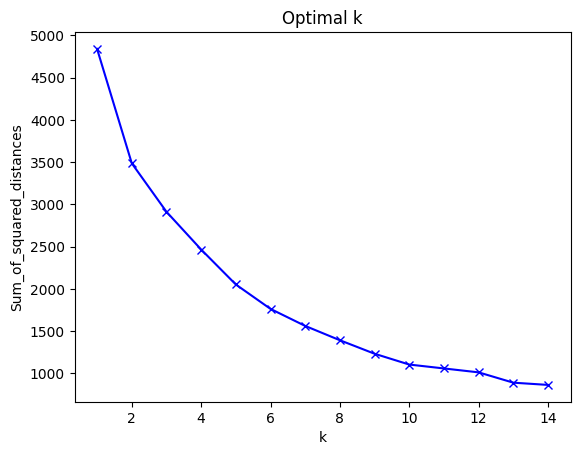

In [ ]:
# 데이터 전처리 완료 후
# K 값 추출 (타당성 평가)
Sum_of_squared_distances = [] # 거리의 합 저장
K = range(1,16) # K값을 1~15 까지 적용
for k in K:
    km = KMeans(n_clusters=k, init='random', max_iter=500, n_init=20)
    # n_clusters=k: 클러스터 개수
    # init='random': 클러스터 중심을 무작위로 초기화
    # max_iter=500: 최대 반복 횟수
    # n_init=20: 서로 다른 초기값으로 KMeans를 몇 번 실행할지 지정

    km = km.fit(data_transformed) # KMeans 모델 훈련
    Sum_of_squared_distances.append(km.inertia_)

# 각 k값에 따른 클러스터 거리의 합을 시각화
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal k')
plt.show()

# 밀도기반 군집 분석 (DBSCAN) & 주성분 분석 (PCA)

---

## 📌 DBSCAN: 밀도기반 군집 분석

**DBSCAN** (*Density-Based Spatial Clustering of Applications with Noise*)은 밀도를 기준으로 데이터를 군집화하는 알고리즘<br>
**이상치(outliers)**에 강하며, **복잡한 형태의 군집**도 처리 가능

### 주요 특징

#### 1. 밀도를 기반으로 한 군집 분석
- **밀도**가 일정 이상인 데이터를 중심으로 군집을 형성
- 미리 클러스터 개수를 지정할 필요 X

#### 2. 이상치(outliers) 처리에 강함
- 이상치 데이터가 많아도 **노이즈**로 간주하여 군집화하지 않음

#### 3. 복잡한 형태의 클러스터 처리
- **오목한**(concave) 또는 **볼록한**(convex) 형태의 클러스터도 처리
- KMeans처럼 **구형 클러스터**에만 의존하지 않음

#### 4. 노이즈에 영향을 받지 않음
- 노이즈는 군집에서 배제되므로, **정확한 클러스터링**이 가능

#### 5. 연산량이 많음
- 밀도 기반 알고리즘 특성상 **KMeans**에 비해 연산량이 많고, 데이터가 많아질수록 시간이 오래 걸림

### 📊 DBSCAN vs KMeans 비교

| 알고리즘  | 군집 기준 | 이상치 처리  | 클러스터 형태        | 연산량  |
|-----------|------------|--------------|----------------------|---------|
| **DBSCAN**| 밀도       | 강함         | 복잡한 형태 처리 가능 | 높음    |
| **KMeans**| 거리       | 약함         | 구형 클러스터         | 낮음    |

### 언제 사용하면 좋을까? 🤔
- **이상치가 많이 포함된 데이터**를 처리할 때
- **노이즈에 강한 군집화**가 필요할 때
- **복잡한 형태의 클러스터**(오목, 볼록)를 처리할 때

> **DBSCAN**은 특히 **비선형 구조의 데이터**나 **이상치가 많은 데이터**에서 효과적인 성능을 발휘합니다.

---

## 📌 PCA: 주성분 분석 (Principal Component Analysis)

**PCA**는 고차원의 데이터를 **저차원으로 축소**하는 차원 축소 기법<br>
**데이터 시각화**나 **특성 간의 유사성 분석**에 자주 사용되며, **고차원** 데이터를 몇 개의 **주성분**으로 압축

### 주요 특징

#### 1. 고차원을 저차원으로 압축
- **p개의 특성**을 **2~n개**의 저차원으로 변환하여 데이터를 시각화하거나 분석
- 데이터의 **변동성**을 최대한 유지하면서, 중요한 정보만 추출하여 차원을 축소

#### 2. 유사한 특성 처리
- 서로 **유사한 특성(Feature)** 들을 하나의 **주성분(Principal Component)**으로 통합하여 차원을 줄이기
- **고차원 데이터**에서 중요한 정보만을 남기고 불필요한 변동을 제거

### PCA의 장점
- **데이터 시각화**: 차원을 2~3차원으로 축소하여 데이터를 시각적으로 이해 가능
- **노이즈 제거**: 주요 성분만을 남기고, 노이즈가 포함된 데이터는 제거되어 분석의 정확성을 향상
- **모델 성능 향상**: 데이터 차원을 줄여 **모델의 성능**을 높이고 **연산 속도**를 향상

---

## 📝 DBSCAN과 PCA의 조합
1. **PCA로 차원 축소**: 데이터의 **주요 성분**을 추출하여 차원을 축소
2. **DBSCAN 적용**: 밀도 기반으로 데이터를 군집화하여 **이상치 처리**와 **복잡한 군집**을 탐지
3. **결과 분석**: 데이터의 군집화 결과와 이상치 정보를 시각화하고 분석

이 조합은 **고차원 데이터**에서 **이상치가 많은 복잡한 데이터**에 특히 유용


In [ ]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.cluster import DBSCAN # 밀도 기반 군집 분석
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize # 데이터 정규화 라이브러리
from sklearn.decomposition import PCA # 주성분 분석(PCA) 라이브러리
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
# data
from google.colab import files
file_uploaded=files.upload()

#X= pd.read_cas('../chap3/data/credit card.csv')
X = pd.read_csv('credit card.csv')
X = X.drop('CUST_ID', axis=1) # 불러온 데이터에서 'CUST_ID'열(colum) 삭제
X.fillna(method='ffill', inplace=True) # 결측값을 앞의 값으로 채움
print(X.head())


Saving credit card.csv to credit card.csv
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ...  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE
0    40.900749           0.818182      95.40  ...        139.509787          0.000000      12
1  3202.467416           0.909091       0.00  ...       1072.340217          0.222222      12
2  2495.148862           1.000000     773.17  ...        627.284787          0.000000      12
3  1666.670542           0.636364    1499.00  ...        627.284787          0.000000      12
4   817.714335           1.000000      16.00  ...        244.791237          0.000000      12

[5 rows x 17 columns]


<ipython-input-8-2f1db3ea53c2>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True) # 결측값을 앞의 값으로 채움


#### 전처리 & 데이터를 3차원으로 축소

In [ ]:
# 전처리 & 데이터를 3차원으로 축소
# 데이터 표준화
scaler = StandardScaler() # 평균이 0, 표준편차가 1이되도록 데이터 크기를 조정
X_scaled = scaler.fit_transform(X) # 스케일링 적용

X_normalized = normalize(X_scaled) # 데이터가 가우스 분포를 따르도록 정규화
X_normalized = pd.DataFrame(X_normalized) # 넘파이 배열을 -> 데이터프레임으로 변환

pca = PCA(n_components = 3) # 3차원으로 축소 선언
X_principal = pca.fit_transform(X_normalized) # 차원 축소 적용
X_principal = pd.DataFrame(X_principal, columns=['P1', 'P2', 'P3'])
print(X_principal.head())

         P1        P2        P3
0 -0.489949 -0.679976  0.096113
1 -0.519099  0.544827 -0.195171
2  0.330633  0.268879 -0.120072
3 -0.481656 -0.097611 -0.456930
4 -0.563512 -0.482506  0.253768


In [ ]:
# DBSCAN 모델 생성 및 결과의 시각화
# 모뎅 튜닝 1
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_principal) # 모델 생성 및 훈련
labels = db_default.labels_ # 각 데이터 포인트에 할당된 모든 클러스터 레이블의 넘파일 배열을 Labels에 저장

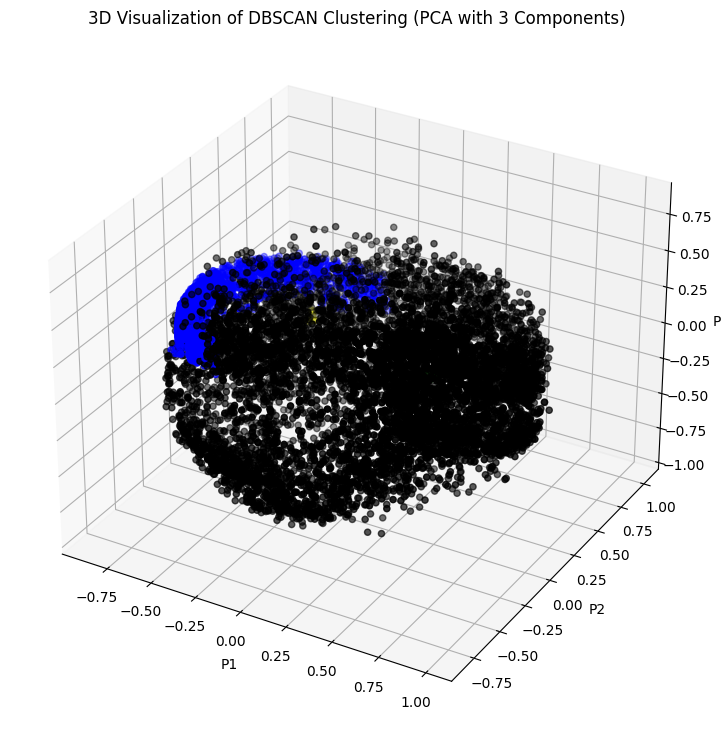

In [ ]:
# 출력 그래프의 색상을 위한 레이블 생성
colours = {0: 'y', 1: 'g', 2: 'b', -1: 'k'}  # 클러스터별 색상 정의, -1은 노이즈를 의미

# 데이터 포인트별로 색상을 할당, 기본값 k
cvec = [colours.get(label, 'k') for label in labels]

# 3차원 시각화
from mpl_toolkits.mplot3d import Axes3D  # 3D 시각화를 위한 라이브러리

fig = plt.figure(figsize=(9, 9))  # 그래프 크기 설정
ax = fig.add_subplot(111, projection='3d')  # 3D 그래프 추가

# P1, P2, P3 축을 사용한 3D 산점도 (클러스터 시각화)
scatter = ax.scatter(X_principal['P1'], X_principal['P2'], X_principal['P3'], c=cvec)

# 축 레이블 설정
ax.set_xlabel('P1')
ax.set_ylabel('P2')
ax.set_zlabel('P3')

# 3차원 시각화 출력
plt.title('3D Visualization of DBSCAN Clustering (PCA with 3 Components)')
plt.show()

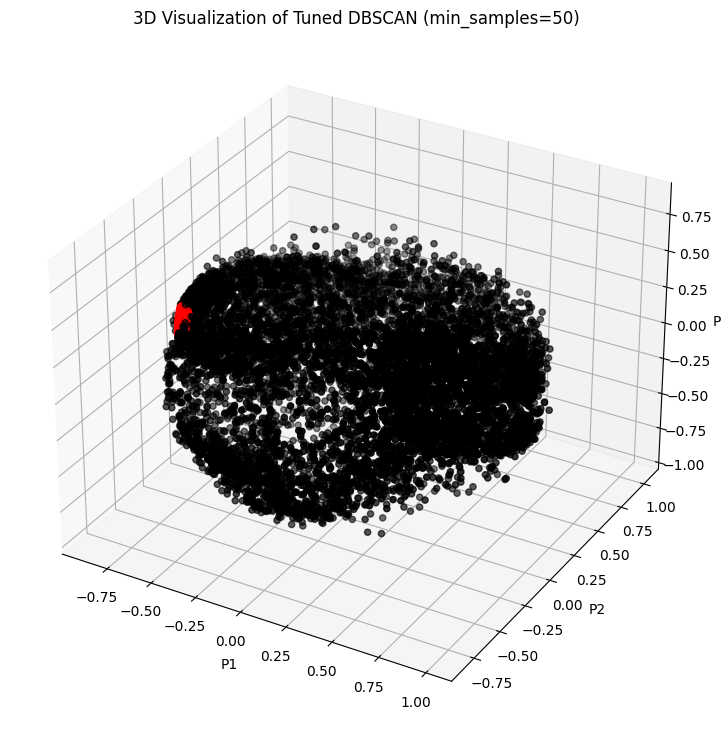

In [ ]:
# 모델 튜닝 2
# min_samples = 50
db = DBSCAN(eps = 0.0375, min_samples = 50).fit(X_principal) # 클러스터링 수행
labels1 = db.labels_

colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

# 데이터 포인트별 색상 결정
cvec = [colours1[label] for label in labels1]

# 3차원 시각화 (튜닝된 DBSCAN 적용 후)
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_principal['P1'], X_principal['P2'], X_principal['P3'], c=cvec)

# 축 레이블 설정
ax.set_xlabel('P1')
ax.set_ylabel('P2')
ax.set_zlabel('P3')

plt.title('3D Visualization of Tuned DBSCAN (min_samples=50)')
plt.show()

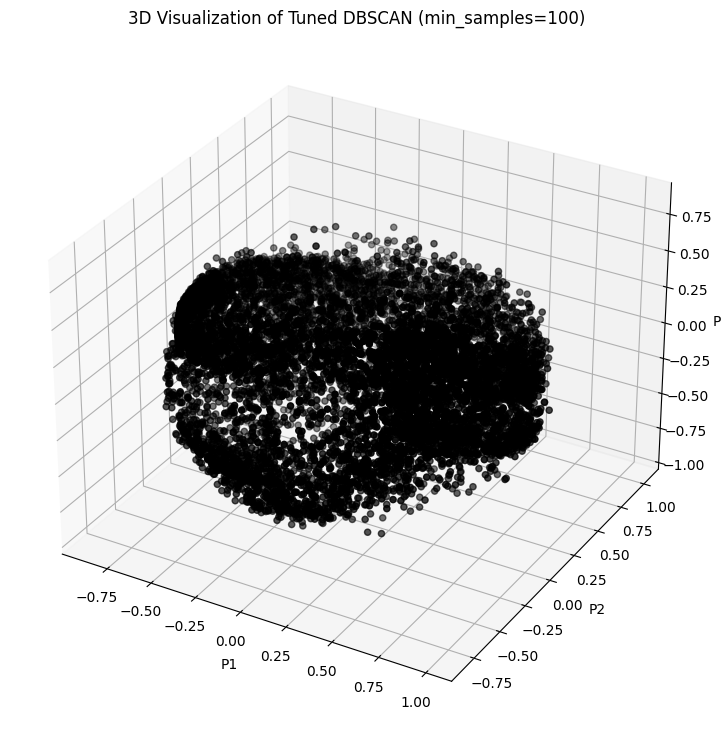

In [ ]:
# 모델튜닝 3
# min_samples = 100
db = DBSCAN(eps = 0.0375, min_samples = 100).fit(X_principal)
labels1 = db.labels_

colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels1]

# 3차원 시각화 (튜닝된 DBSCAN 적용 후)
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_principal['P1'], X_principal['P2'], X_principal['P3'], c=cvec)

# 축 레이블 설정
ax.set_xlabel('P1')
ax.set_ylabel('P2')
ax.set_zlabel('P3')

plt.title('3D Visualization of Tuned DBSCAN (min_samples=100)')
plt.show()